### Importing the libraries

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

### What is a High Dimensional Data?

- In the field of Machine Learning, High dimensional data refers to the data with a large number of data features/attributes which results in the dataset with many dimensions
- The number of dimensions here refers to the number of features used to describe each datapoint
- These datasets can be challenging to work with due to their complexity and the sheer volume of information that each data point contains.
- More features mean increased computational costs and potential overfitting risks.
- Major areas where high dimensionality data is used are: Image Processing, Genomics and Natural Language Processing
- High Dimensional Data can manifest across various modalities such as image data, text data, genomics data, audio data, sensor data etc.

### Why is Dimensionality reduction needed?

- As we have seen before, the high dimensional datasets have a large number of features. Hence we need dimensionality reduction because:
    - Computational Efficiency: Reduces complexity for faster processing.
    - Feature Extraction: Identifies relevant features for better detection.
    - Noise Reduction: Filters out irrelevant data for improved accuracy.
    - Visualization: Simplifies data for easier interpretation.
    - Model Interpretability: Enhances understanding of relationships for better diagnostics.

### About the Dataset

- The dataset comprises observational and simulated data on supernovae events, offering insights into their spatial distribution, luminosity, and spectral characteristics. With parameters like redshift and host galaxy properties, it aids in classifying supernovae types and serves as a vital resource for cosmological studies. By analyzing these data, astronomers advance our understanding of stellar evolution, galaxy formation, and the fundamental properties of the universe.

- The dataset was obtained from unstop hackathon on stellar analytics and now is publicly available in kaggle for analysis.

- The dataset has 40000 rows and 82 columns

- The dataset has the following columns:

    - SUBSURVEY: This column likely indicates the specific survey or sub-survey under which each supernova observation was conducted.
    - SNID: This column provides a unique identifier for each supernova event, facilitating tracking and referencing in the dataset.
    - IAUC: The International Astronomical Union Circular (IAUC) designation, if available, which may serve as an additional identifier for the supernova event.
    - FAKE: A binary indicator (1 or 2) denoting whether the supernova event is real (1) or simulated (2), providing insight into the nature of the observation.
    - RA and DECL: These columns represent the Right Ascension and Declination coordinates, respectively, pinpointing the celestial location of each supernova event.
    - PIXSIZE, NXPIX, NYPIX, and CCDNUM: These columns relate to observational parameters, such as pixel size, number of pixels in the X and Y directions, and the CCD number associated with the observation.
    - SNTYPE: This column categorizes the supernova event into different types based on observational characteristics or spectral features.
    - NOBS, PTROBS_MIN, and PTROBS_MAX: These columns provide information about the number of observations made for each supernova event and pointers to those observations.
    - MWEBV and MWEBV_ERR: Columns related to Galactic extinction correction, indicating the amount of interstellar dust along the line of sight and its associated error.
    - REDSHIFT_HELIO, REDSHIFT_HELIO_ERR, REDSHIFT_FINAL, and REDSHIFT_FINAL_ERR: These columns contain information about the heliocentric and final redshifts of the supernova events, along with associated errors.
    - VPEC and VPEC_ERR: Columns representing the peculiar velocity of the supernova events and its error, which can affect redshift measurements.
    - HOSTGAL_OBJID: Object ID of the host galaxy associated with each supernova event.
    - HOSTGAL_PHOTOZ and HOSTGAL_PHOTOZ_ERR: Photometric redshift and its error for the host galaxy.
    - HOSTGAL_SPECZ and HOSTGAL_SPECZ_ERR: Spectroscopic redshift and its error for the host galaxy, if available.
    - Columns related to host galaxy properties, such as magnitudes in different filters (HOSTGAL_MAG_g, HOSTGAL_MAG_r, etc.), and flux measurements (HOSTGAL_SB_FLUXCAL_g, HOSTGAL_SB_FLUXCAL_r, etc.).
    - PEAKMJD: Modified Julian Date (MJD) of peak brightness for each supernova event.
    - SEARCH_TYPE: Type of search conducted for each supernova event, indicating the method or approach used in its discovery.
    - SIM_MODEL_NAME, SIM_MODEL_INDEX, and other columns related to simulated events, providing information about the simulation models used and associated parameters.

### General information about the dataset

- Simulation Parameters: Columns like SIM_MODEL_NAME, SIM_MODEL_INDEX, and others offer insights into simulated events, aiding in the comparison and validation of observational data against theoretical models.
- Time Evolution: Parameters like PEAKMJD provide information about the timing of peak brightness, crucial for studying the temporal evolution of supernovae and constraining explosion models.
- Galactic Extinction Correction: MWEBV and MWEBV_ERR columns help correct for the absorption and scattering of light by interstellar dust, allowing astronomers to accurately determine intrinsic luminosities and redshifts.

### Reading the Dataset

In [17]:
df = pd.read_excel('D:\SEM 4\\astrotrain.xlsx')

In [18]:
df.head()

,SUBSURVEY,SNID,IAUC,FAKE,RA,DECL,PIXSIZE,NXPIX,NYPIX,CCDNUM,...,SIM_PEAKMAG_z,SIM_EXPOSURE_g,SIM_EXPOSURE_r,SIM_EXPOSURE_i,SIM_EXPOSURE_z,SIM_GALFRAC_g,SIM_GALFRAC_r,SIM_GALFRAC_i,SIM_GALFRAC_z,SIM_SUBSAMPLE_INDEX
0,,10473255,NULL,2,53.468451,-28.349424,0.27,-9,-9,44,...,23.664705,1,1,1,1,2.378913e+00,1.384469,1.228777,1.400711,-9
1,,2110040,NULL,2,53.508185,-28.470810,0.27,-9,-9,50,...,24.363064,1,1,1,1,3.254097e-14,7.968017,3.885829,3.697690,-9
2,,9966178,NULL,2,35.077432,-6.979272,0.27,-9,-9,51,...,23.319248,1,1,1,1,5.848331e-01,0.558739,0.499326,0.525232,-9
3,,19732134,NULL,2,52.852204,-27.184372,0.27,-9,-9,3,...,22.917084,1,1,1,1,4.299130e+00,13.111013,19.559818,34.610160,-9
4,,1582526,NULL,2,36.932302,-5.248342,0.27,-9,-9,55,...,22.626780,1,1,1,1,2.718171e-01,0.285706,0.416343,0.543132,-9


### Basic EDA

In [19]:
df.shape

(40000, 82)

In [20]:
df.describe()

,SNID,FAKE,RA,DECL,PIXSIZE,NXPIX,NYPIX,CCDNUM,SNTYPE,NOBS,...,SIM_PEAKMAG_z,SIM_EXPOSURE_g,SIM_EXPOSURE_r,SIM_EXPOSURE_i,SIM_EXPOSURE_z,SIM_GALFRAC_g,SIM_GALFRAC_r,SIM_GALFRAC_i,SIM_GALFRAC_z,SIM_SUBSAMPLE_INDEX
count,4.000000e+04,40000.0,40000.000000,40000.000000,4.000000e+04,40000.0,40000.0,40000.00000,40000.000000,40000.000000,...,40000.000000,40000.0,40000.0,40000.0,40000.0,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,40000.0
mean,1.676771e+07,2.0,39.835341,-19.407487,2.700000e-01,-9.0,-9.0,31.58690,113.696525,59.514675,...,22.711626,1.0,1.0,1.0,1.0,1.019355e+01,3.732287e+00,4.883576e+00,7.001202e+00,-9.0
std,9.683794e+06,0.0,14.800212,15.051050,2.646250e-13,0.0,0.0,17.43592,12.265149,24.185423,...,5.092737,0.0,0.0,0.0,0.0,4.586269e+02,6.478933e+00,7.795332e+00,1.688017e+01,0.0
min,2.354000e+03,2.0,6.392980,-44.976723,2.700000e-01,-9.0,-9.0,1.00000,101.000000,5.000000,...,-9.000000,1.0,1.0,1.0,1.0,1.006474e-32,3.767641e-33,9.054460e-14,2.553218e-14,-9.0
25%,8.367022e+06,2.0,35.716156,-28.640380,2.700000e-01,-9.0,-9.0,16.00000,101.000000,42.000000,...,22.935463,1.0,1.0,1.0,1.0,6.521853e-14,9.364567e-01,1.249910e+00,1.574110e+00,-9.0
50%,1.686448e+07,2.0,41.157764,-27.204088,2.700000e-01,-9.0,-9.0,32.00000,120.000000,60.000000,...,23.490799,1.0,1.0,1.0,1.0,5.749799e-01,1.987298e+00,2.595640e+00,3.422674e+00,-9.0
75%,2.510454e+07,2.0,52.866702,-4.633564,2.700000e-01,-9.0,-9.0,47.00000,122.000000,73.000000,...,24.060365,1.0,1.0,1.0,1.0,2.064853e+00,4.234644e+00,5.399975e+00,7.365328e+00,-9.0
max,3.359532e+07,2.0,55.512060,0.978050,2.700000e-01,-9.0,-9.0,62.00000,133.000000,223.000000,...,28.017927,1.0,1.0,1.0,1.0,6.577444e+04,5.800674e+02,2.593467e+02,1.226156e+03,-9.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 82 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SUBSURVEY             40000 non-null  object 
 1   SNID                  40000 non-null  int64  
 2   IAUC                  40000 non-null  object 
 3   FAKE                  40000 non-null  int64  
 4   RA                    40000 non-null  float64
 5   DECL                  40000 non-null  float64
 6   PIXSIZE               40000 non-null  float64
 7   NXPIX                 40000 non-null  int64  
 8   NYPIX                 40000 non-null  int64  
 9   CCDNUM                40000 non-null  int64  
 10  SNTYPE                40000 non-null  int64  
 11  NOBS                  40000 non-null  int64  
 12  PTROBS_MIN            40000 non-null  int64  
 13  PTROBS_MAX            40000 non-null  int64  
 14  MWEBV                 40000 non-null  float64
 15  MWEBV_ERR          

In [22]:
df.isna().sum()

SUBSURVEY              0
SNID                   0
IAUC                   0
FAKE                   0
RA                     0
                      ..
SIM_GALFRAC_g          0
SIM_GALFRAC_r          0
SIM_GALFRAC_i          0
SIM_GALFRAC_z          0
SIM_SUBSAMPLE_INDEX    0
Length: 82, dtype: int64

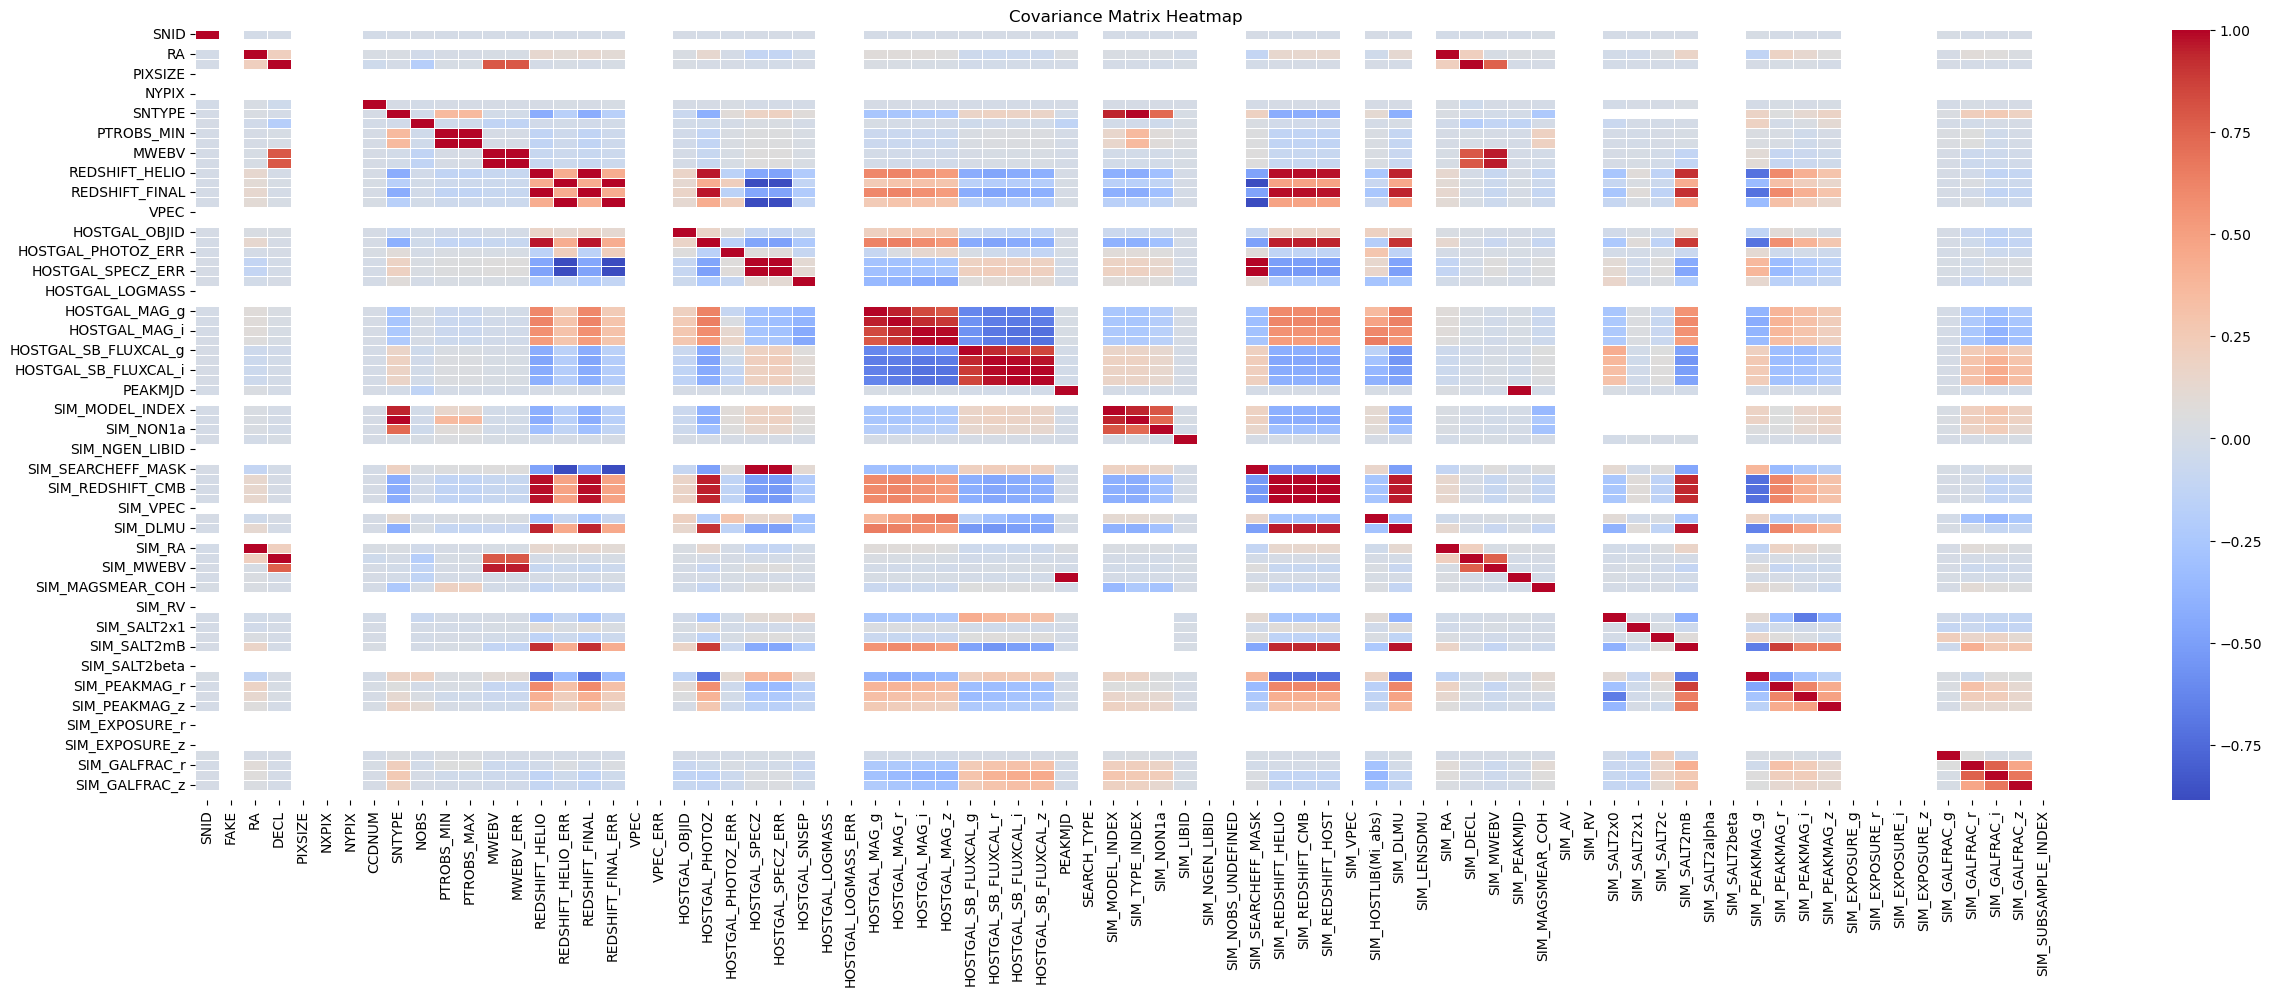

In [23]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(30, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

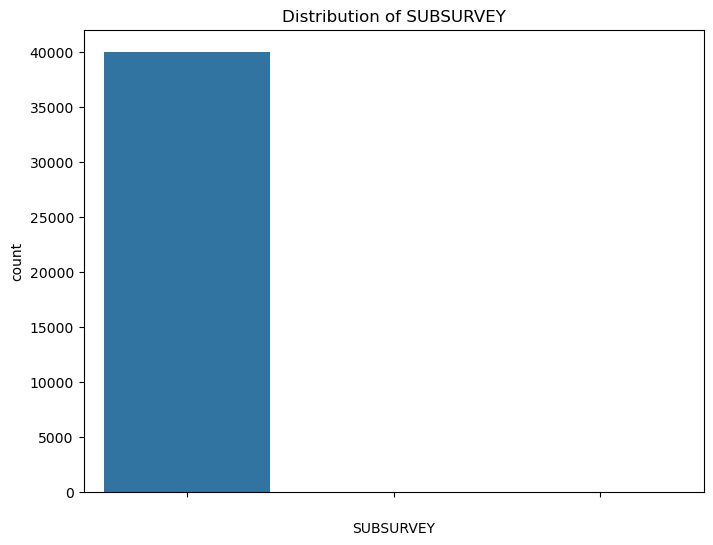

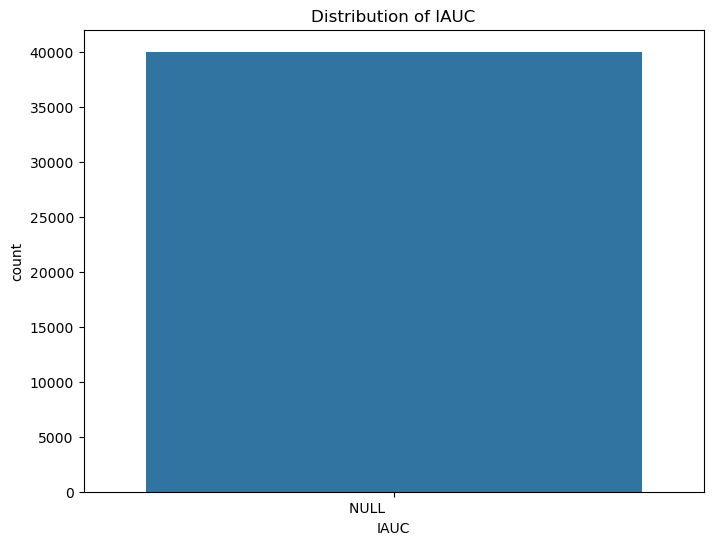

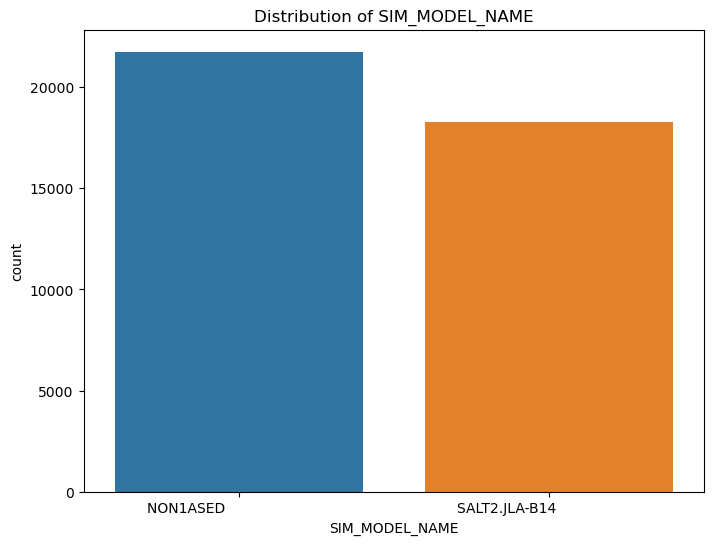

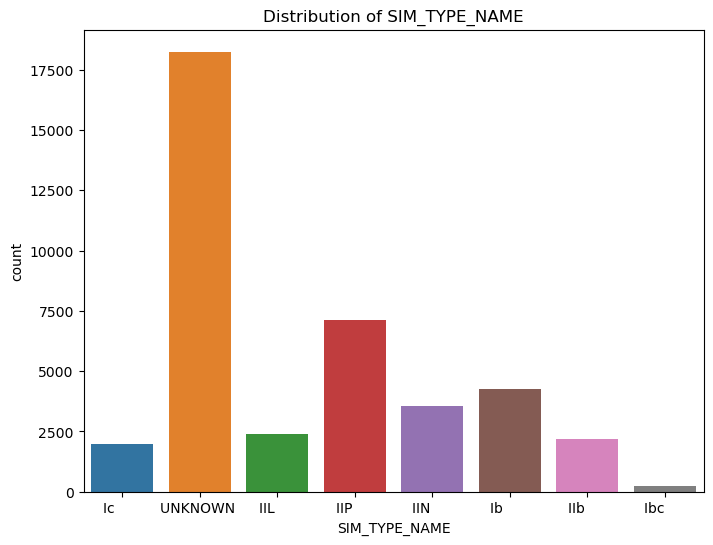

In [24]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks()
    plt.show()

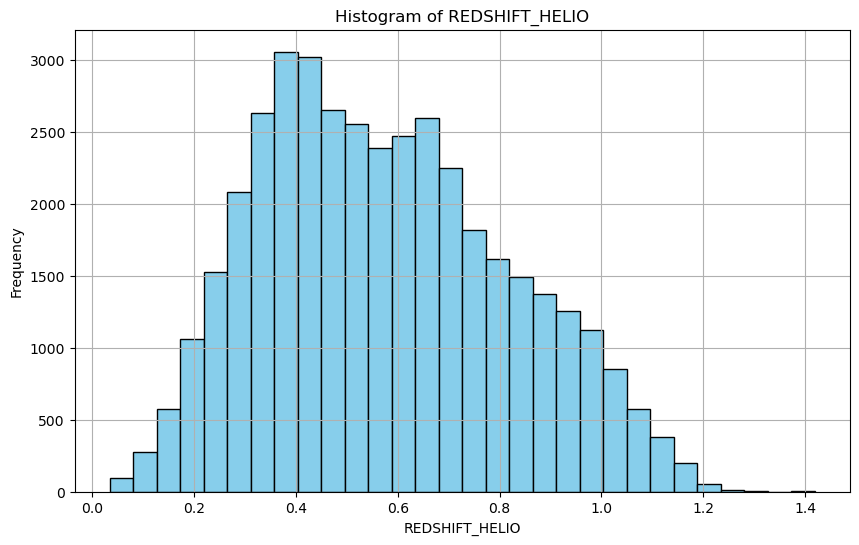

In [112]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['REDSHIFT_HELIO'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of REDSHIFT_HELIO')
plt.xlabel('REDSHIFT_HELIO')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

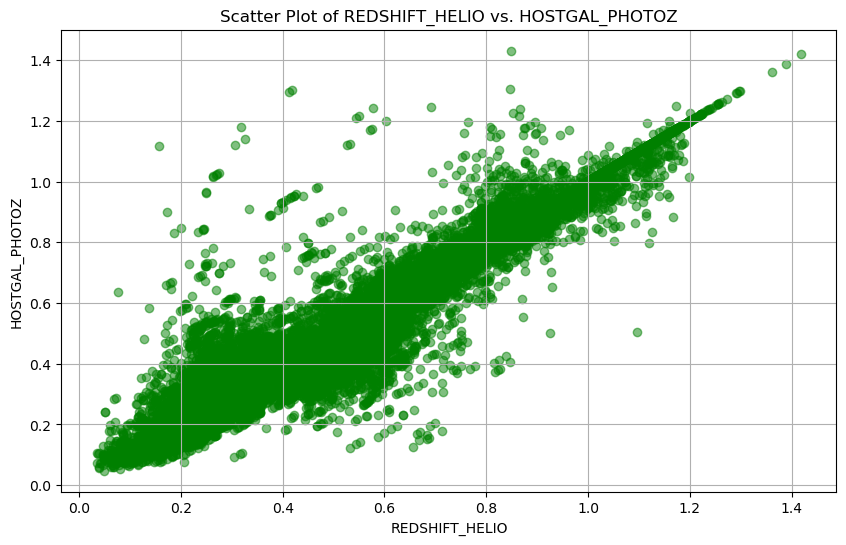

In [113]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['REDSHIFT_HELIO'], df['HOSTGAL_PHOTOZ'], color='green', alpha=0.5)
plt.title('Scatter Plot of REDSHIFT_HELIO vs. HOSTGAL_PHOTOZ')
plt.xlabel('REDSHIFT_HELIO')
plt.ylabel('HOSTGAL_PHOTOZ')
plt.grid(True)
plt.show()

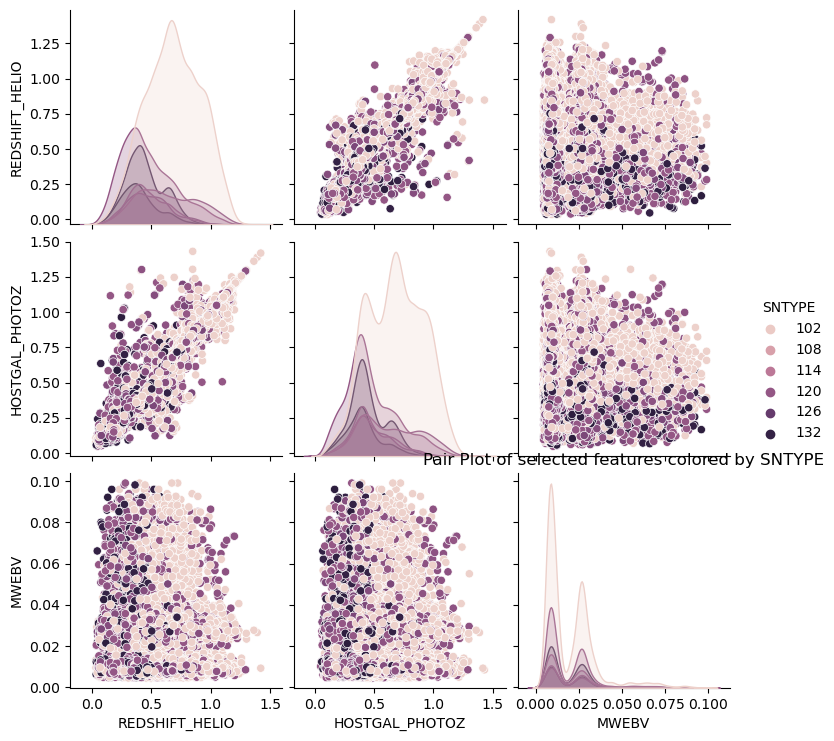

In [114]:
# Pairplot
sns.pairplot(df[['REDSHIFT_HELIO', 'HOSTGAL_PHOTOZ', 'MWEBV', 'SNTYPE']], hue='SNTYPE', diag_kind='kde')
plt.title('Pair Plot of selected features colored by SNTYPE')
plt.show()

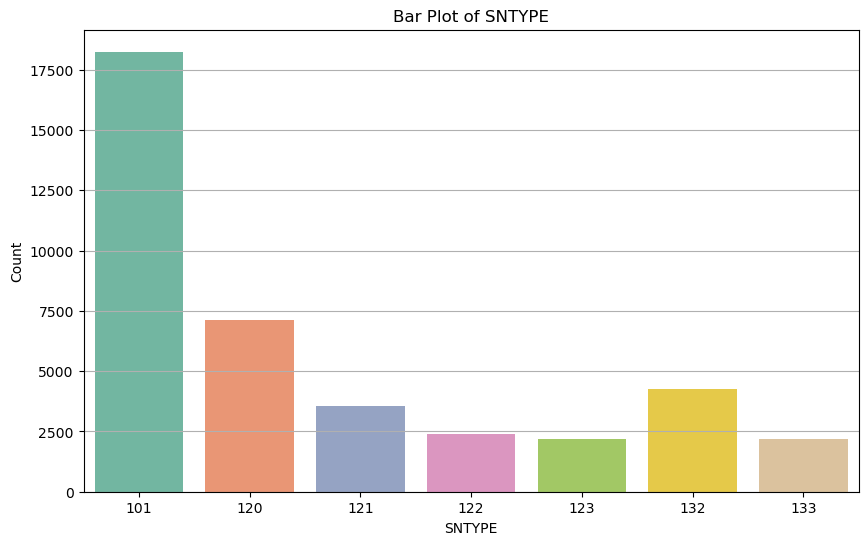

In [115]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='SNTYPE', data=df, palette='Set2')
plt.title('Bar Plot of SNTYPE')
plt.xlabel('SNTYPE')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

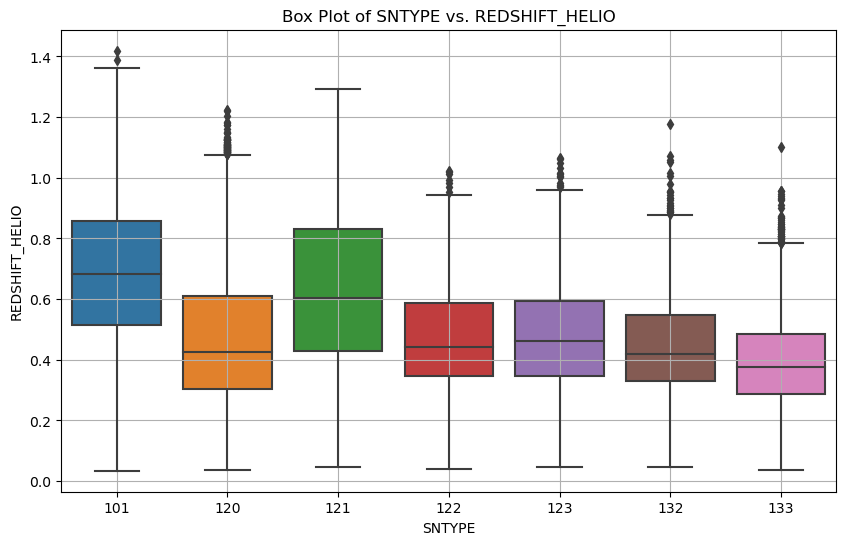

In [116]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='SNTYPE', y='REDSHIFT_HELIO', data=df)
plt.title('Box Plot of SNTYPE vs. REDSHIFT_HELIO')
plt.xlabel('SNTYPE')
plt.ylabel('REDSHIFT_HELIO')
plt.grid(True)
plt.show()

### Preprocessing

In [117]:
# Selecting the numeric features
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [27]:
numeric_df.isna().sum()

SNID                   0
FAKE                   0
RA                     0
DECL                   0
PIXSIZE                0
                      ..
SIM_GALFRAC_g          0
SIM_GALFRAC_r          0
SIM_GALFRAC_i          0
SIM_GALFRAC_z          0
SIM_SUBSAMPLE_INDEX    0
Length: 78, dtype: int64

- KNN imputation is a data imputation technique used to fill in missing values in a dataset based on the values of its nearest neighbors. It calculates the missing value by averaging or taking the majority vote of the values of the k nearest neighbors, where k is a user-specified parameter.

In [28]:
imputer = KNNImputer()
imputed_data = imputer.fit_transform(numeric_df)
imputed_df = pd.DataFrame(imputed_data, columns=numeric_df.columns)

In [29]:
imputed_df

,SNID,FAKE,RA,DECL,PIXSIZE,NXPIX,NYPIX,CCDNUM,SNTYPE,NOBS,...,SIM_PEAKMAG_z,SIM_EXPOSURE_g,SIM_EXPOSURE_r,SIM_EXPOSURE_i,SIM_EXPOSURE_z,SIM_GALFRAC_g,SIM_GALFRAC_r,SIM_GALFRAC_i,SIM_GALFRAC_z,SIM_SUBSAMPLE_INDEX
0,10473255.0,2.0,53.468451,-28.349424,0.27,-9.0,-9.0,44.0,133.0,61.0,...,23.664705,1.0,1.0,1.0,1.0,2.378913e+00,1.384469,1.228777e+00,1.400711e+00,-9.0
1,2110040.0,2.0,53.508185,-28.470810,0.27,-9.0,-9.0,50.0,101.0,69.0,...,24.363064,1.0,1.0,1.0,1.0,3.254097e-14,7.968017,3.885829e+00,3.697690e+00,-9.0
2,9966178.0,2.0,35.077432,-6.979272,0.27,-9.0,-9.0,51.0,122.0,65.0,...,23.319248,1.0,1.0,1.0,1.0,5.848331e-01,0.558739,4.993262e-01,5.252323e-01,-9.0
3,19732134.0,2.0,52.852204,-27.184372,0.27,-9.0,-9.0,3.0,120.0,34.0,...,22.917084,1.0,1.0,1.0,1.0,4.299130e+00,13.111013,1.955982e+01,3.461016e+01,-9.0
4,1582526.0,2.0,36.932302,-5.248342,0.27,-9.0,-9.0,55.0,101.0,65.0,...,22.626780,1.0,1.0,1.0,1.0,2.718171e-01,0.285706,4.163428e-01,5.431316e-01,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,16005072.0,2.0,40.736879,-1.961712,0.27,-9.0,-9.0,60.0,101.0,46.0,...,22.403696,1.0,1.0,1.0,1.0,2.884062e-01,0.663230,1.186423e+00,2.066639e+00,-9.0
39996,32180995.0,2.0,52.286809,-27.336364,0.27,-9.0,-9.0,4.0,121.0,59.0,...,24.779268,1.0,1.0,1.0,1.0,1.663175e-14,1.023620,2.192368e+00,2.528582e+00,-9.0
39997,3508417.0,2.0,54.662131,-27.642363,0.27,-9.0,-9.0,54.0,121.0,32.0,...,23.454807,1.0,1.0,1.0,1.0,8.707220e-15,0.335223,9.132640e-01,1.670266e+00,-9.0
39998,16194817.0,2.0,53.313236,-27.079382,0.27,-9.0,-9.0,25.0,101.0,7.0,...,-9.000000,1.0,1.0,1.0,1.0,1.536111e-02,0.020247,2.152173e-13,2.263497e-13,-9.0


- Scaling is the process of transforming numerical features to a standard scale, usually between 0 and 1 or with a mean of 0 and a standard deviation of 1. It's a crucial preprocessing step in many machine learning algorithms.
- In PCA, scaling maintains the relative importance of features and aids in identifying the true underlying structure of the data by centering it around zero. 

In [30]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

In [93]:
X = imputed_df.drop(columns=['SNTYPE']) 
y = imputed_df['SNTYPE']

In [31]:
scaled_df

array([[-0.65000695,  0.        ,  0.92115443, ..., -0.46885044,
        -0.33178347,  0.        ],
       [-1.51364775,  0.        ,  0.92383916, ..., -0.12799452,
        -0.19570615,  0.        ],
       [-0.70237107,  0.        , -0.32147972, ..., -0.5624269 ,
        -0.38364846,  0.        ],
       ...,
       [-1.36924211,  0.        ,  1.00180834, ..., -0.50932551,
        -0.31581451,  0.        ],
       [-0.05916067,  0.        ,  0.91066695, ..., -0.62648221,
        -0.41476419,  0.        ],
       [-0.614561  ,  0.        , -0.24351946, ..., -0.38630219,
        -0.24508297,  0.        ]])

### Principal Component Analysis

- A covariance matrix is a square matrix that summarizes the covariances between multiple variables in a dataset, providing information about the relationships and variability among them.

In [32]:
covariance_matrix = np.cov(scaled_df.T)
covariance_df = pd.DataFrame(covariance_matrix, columns=X.columns, index=X.columns)

In [34]:
print("Covariance Matrix:")
print(covariance_df)

Covariance Matrix:
                         SNID  FAKE        RA      DECL  PIXSIZE  NXPIX  \
SNID                 1.000025   0.0 -0.008677 -0.001440      0.0    0.0   
FAKE                 0.000000   0.0  0.000000  0.000000      0.0    0.0   
RA                  -0.008677   0.0  1.000025  0.210767      0.0    0.0   
DECL                -0.001440   0.0  0.210767  1.000025      0.0    0.0   
PIXSIZE              0.000000   0.0  0.000000  0.000000      0.0    0.0   
...                       ...   ...       ...       ...      ...    ...   
SIM_GALFRAC_g        0.007041   0.0  0.003824  0.006285      0.0    0.0   
SIM_GALFRAC_r       -0.002338   0.0  0.081849 -0.001878      0.0    0.0   
SIM_GALFRAC_i        0.001718   0.0  0.067962 -0.006328      0.0    0.0   
SIM_GALFRAC_z        0.006199   0.0  0.033945 -0.006404      0.0    0.0   
SIM_SUBSAMPLE_INDEX  0.000000   0.0  0.000000  0.000000      0.0    0.0   

                     NYPIX    CCDNUM      NOBS  PTROBS_MIN  ...  \
SNID         

- Diagonal Elements:

    - The diagonal elements of the covariance matrix represent the variance of each variable. For example, the variance of 'SNID' is approximately 1.0, and for 'FAKE', it is 0.0, indicating that 'SNID' varies more compared to 'FAKE', which doesn't vary at all.

- Off-Diagonal Elements:

    - Off-diagonal elements represent the covariance between pairs of variables.
    - Positive values indicate a positive linear relationship between variables, while negative values indicate a negative linear relationship.
    - For example:
    - The covariance between 'SNID' and 'RA' is approximately -0.0087, indicating a weak negative relationship between these two variables.
    - The covariance between 'RA' and 'DECL' is approximately 0.2108, indicating a weak positive relationship between these two variables.
    
- Interpretation:

    - Larger magnitude values of covariance indicate stronger relationships between variables.
    - Positive covariance suggests that as one variable increases, the other tends to increase as well, and vice versa for negative covariance.
    - Covariance values closer to zero indicate weaker relationships between variables.

- Application:

    - Understanding the covariance between variables helps in identifying patterns and relationships in the dataset.
    - It can assist in feature selection, dimensionality reduction, and building predictive models.

In [35]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_df = pd.DataFrame({'Eigenvalue': eigen_values, 'Eigenvector': eigen_vectors.tolist()}, index=range(1, len(eigen_values) + 1))

In [38]:
print("Eigenvalues and Eigenvectors:")
eigen_df.head()

Eigenvalues and Eigenvectors:


,Eigenvalue,Eigenvector
1,13.999325,"[0.0013545423030781318, 0.0007034168044895521,..."
2,5.099356,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4.440383,"[-0.03952764523244667, -0.039367611804096515, ..."
4,3.514321,"[0.00013822784176947622, 0.1254362357926903, -..."
5,3.019821,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


- Eigenvalues: Eigenvalues represent the variance explained by each principal component.Higher eigenvalues indicate that the corresponding principal components capture more variance in the data. In the given data, the first eigenvalue is significantly larger than the rest, suggesting that the first principal component explains a substantial amount of variance in the dataset compared to the others.

- Eigenvectors: Eigenvectors represent the directions in the feature space along which the data varies the most.The elements of each eigenvector indicate the weights of the original features contributing to that principal component.In the given data, each eigenvector provides insight into the linear combinations of features that define the principal components. The magnitude of each element indicates the importance of the corresponding feature in defining that principal component.

In [39]:
pca = PCA(n_components=0.95)
pca_d = pca.fit_transform(scaled_df)

- Capturing 95% of the variance in PCA strikes a balance between dimensionality reduction and information preservation. This threshold is commonly chosen as it allows for significant reduction in dimensionality while retaining a large portion of the original variability, making the resulting dataset suitable for further analysis

In [40]:
print("Number of Principal Components:", pca.n_components_)

Number of Principal Components: 25


In [41]:
pca_df = pd.DataFrame(data=pca_d, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])
print(pca_df)

             PC1       PC2       PC3        PC4       PC5       PC6       PC7  \
0      -0.586355 -0.622418 -1.516635  -2.072268  4.485340  0.513957 -1.307532   
1      -7.048675  2.676441 -0.620881   0.365371 -1.170852  2.333930 -0.027770   
2      -0.539921 -4.067171 -0.300306  -1.453544  0.091305 -1.587555 -0.245838   
3      10.201771  6.947127  0.855737   1.098716 -0.646287  2.111471  2.995838   
4       0.259741 -3.735727  0.288540   1.489551 -0.691203 -1.822533  0.791439   
...          ...       ...       ...        ...       ...       ...       ...   
39995   2.396039 -1.821708  1.488212   2.233834 -0.977906  1.463550  1.168756   
39996  -2.342828 -1.871631 -2.225943  -2.353361 -0.888615  1.767748  1.073233   
39997  -2.137653 -0.654541 -1.423134  -1.303888 -1.789117 -0.443978  0.407916   
39998  10.369263 -5.932133 -2.534583  13.305458  5.432480  5.851081  1.315157   
39999  -0.654355 -1.127582  1.931110  -1.348903  2.772430  0.868118 -1.124279   

            PC8       PC9  

- The provided data represents the transformed dataset after applying PCA, where each row corresponds to an observation and each column corresponds to a principal component (PC). Each value in the table represents the projection of an observation onto the corresponding principal component, indicating the importance of that component for describing the variability in the original data. Higher absolute values suggest stronger influence of the corresponding principal component on the observation, potentially indicating significant patterns or relationships captured by that component.

In [42]:
explained_variance_df = pd.DataFrame({'Explained Variance Ratio': pca.explained_variance_ratio_,
                                      'Cumulative Explained Variance Ratio': np.cumsum(pca.explained_variance_ratio_)},
                                     index=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])
print(explained_variance_df)

      Explained Variance Ratio  Cumulative Explained Variance Ratio
PC1                   0.254527                             0.254527
PC2                   0.092713                             0.347240
PC3                   0.080732                             0.427972
PC4                   0.063895                             0.491867
PC5                   0.054904                             0.546772
PC6                   0.037615                             0.584387
PC7                   0.037318                             0.621705
PC8                   0.034933                             0.656638
PC9                   0.032306                             0.688944
PC10                  0.030280                             0.719224
PC11                  0.023234                             0.742458
PC12                  0.019420                             0.761878
PC13                  0.018631                             0.780509
PC14                  0.018577                  

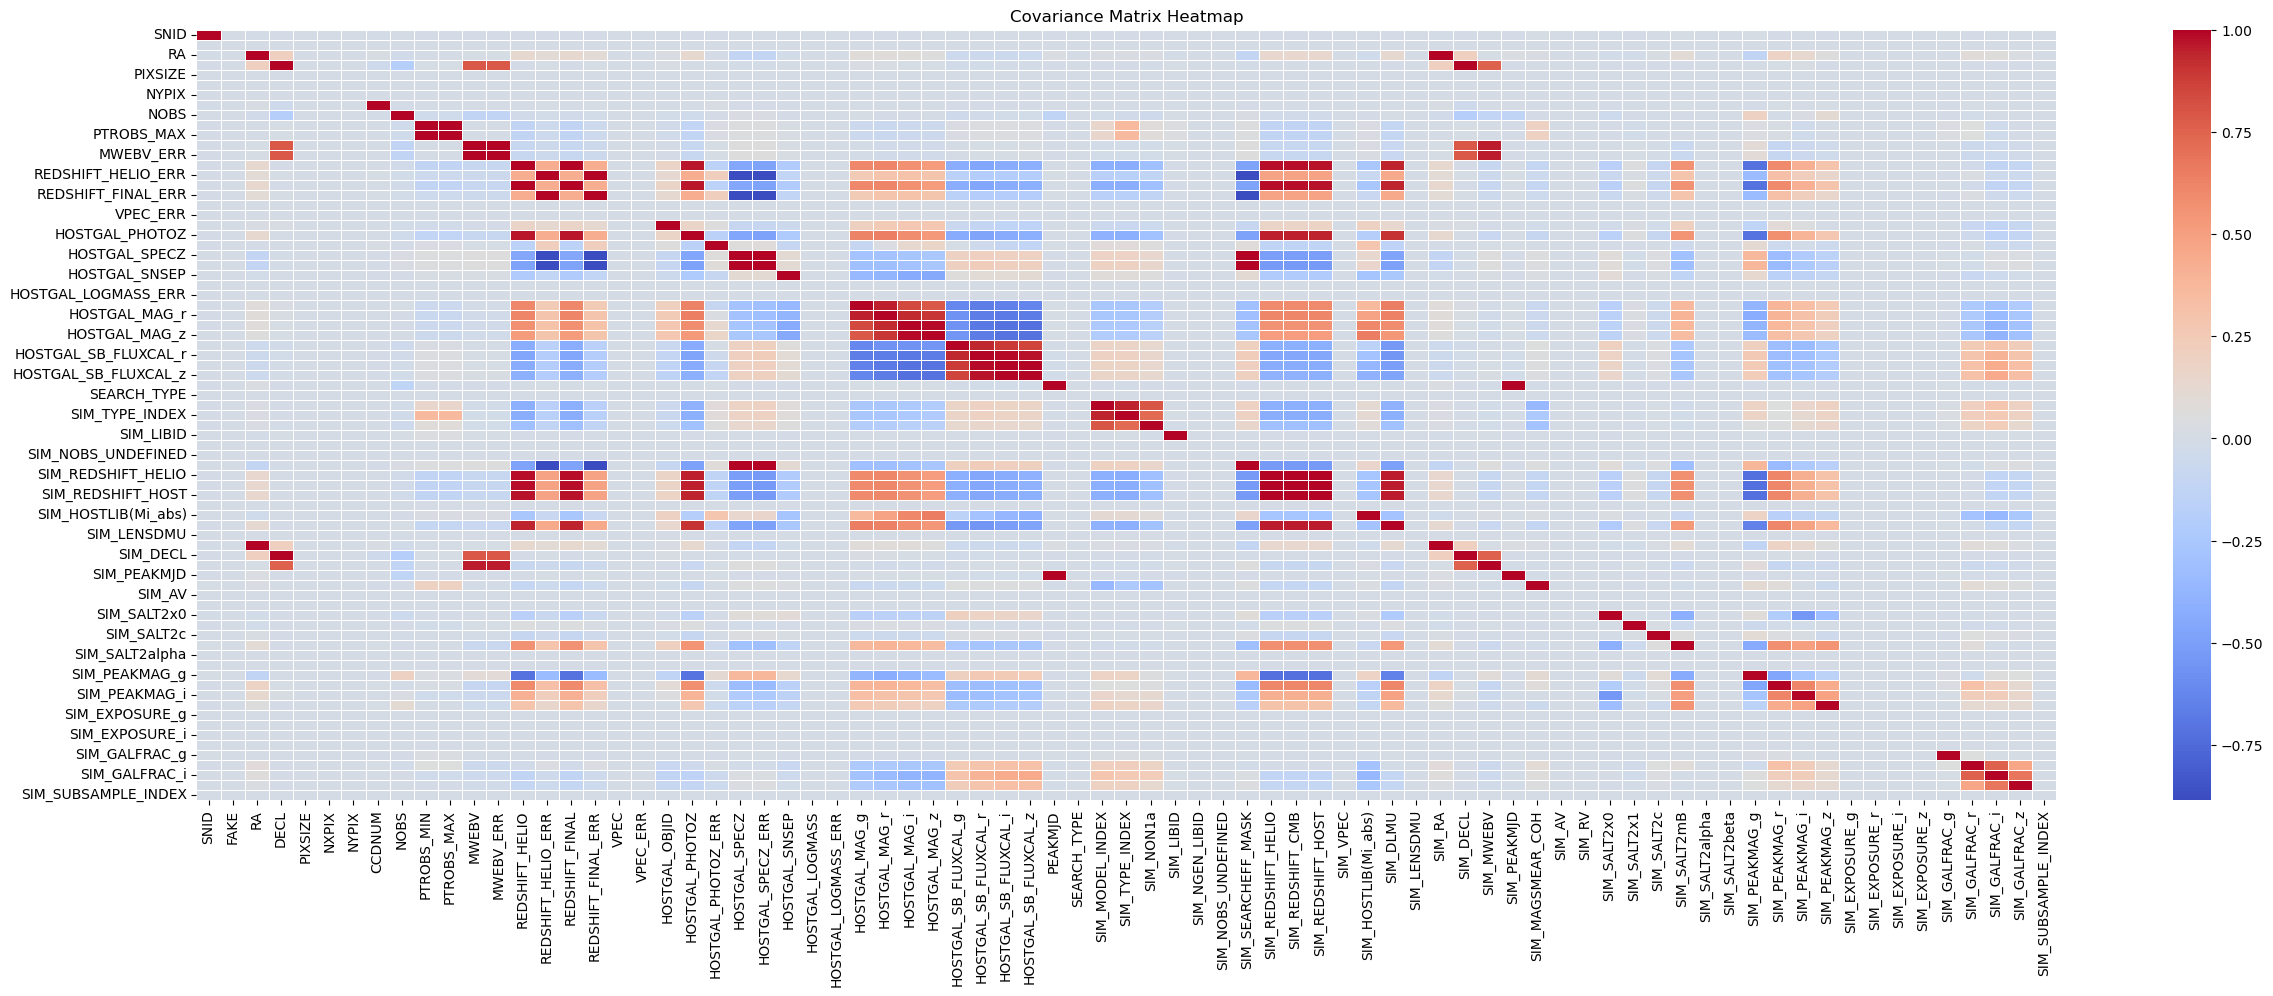

In [43]:
# Heatmap for visualising the correlations
plt.figure(figsize=(30, 10))
sns.heatmap(covariance_df, annot=False, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

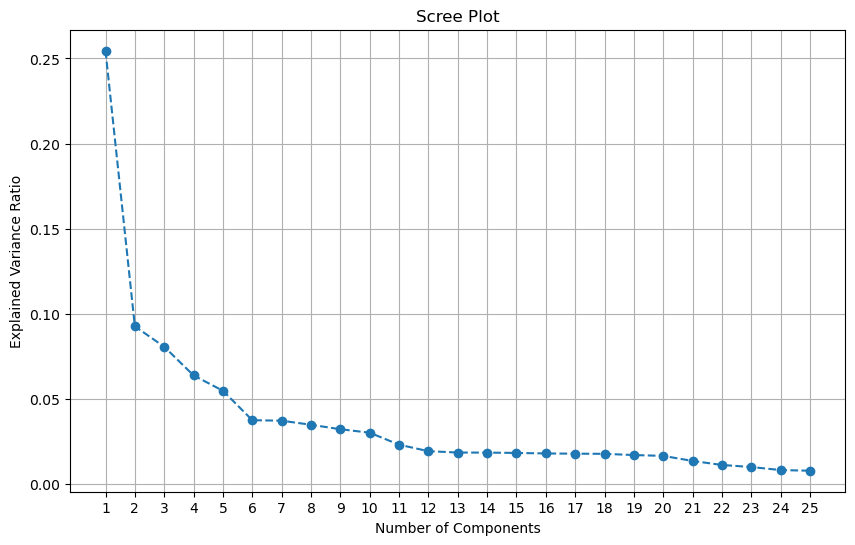

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, pca.n_components_ + 1))
plt.grid(True)
plt.show()

- Explained Variance Ratio: This measures the proportion of total variance in the original dataset that each principal component explains. For instance, PC1 accounts for approximately 25.45% of the total variance, indicating its significance in capturing variability within the data. Higher values signify that the corresponding principal component captures more of the dataset's variability.

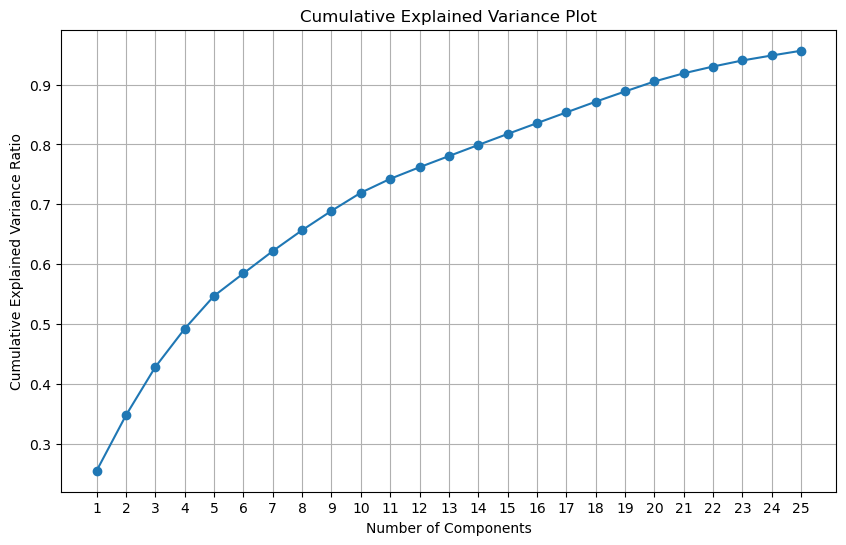

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, pca.n_components_ + 1))
plt.grid(True)
plt.show()

- Cumulative Explained Variance Ratio: This shows the cumulative proportion of variance explained by considering each principal component successively. For example, by the 5th principal component (PC5), around 54.68% of the total variance is explained cumulatively. Larger cumulative values indicate that a higher percentage of the total variance is captured as more principal components are considered.

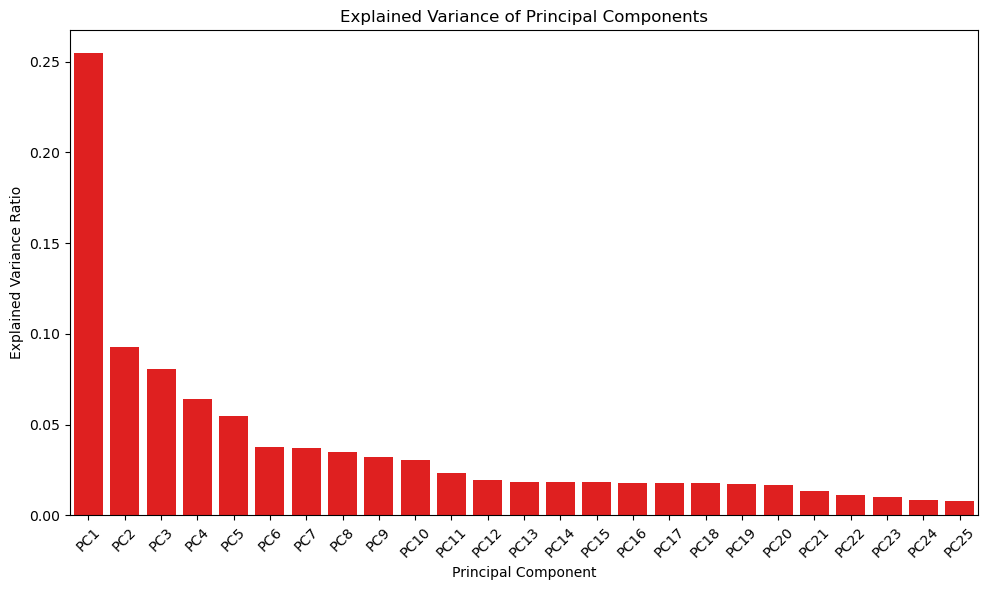

In [46]:
plt.figure(figsize=(10, 6))  
sns.barplot(x=explained_variance_df.index, y='Explained Variance Ratio', data=explained_variance_df, color="r")
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of Principal Components')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Linear Discriminant Analysis

-  LDA stands for Linear Discriminant Analysis. It's a dimensionality reduction technique commonly used in machine learning and statistics for feature extraction and classification.

- In LDA, the goal is to find a linear combination of features that characterizes or separates two or more classes of objects or events. It differs from PCA (Principal Component Analysis) in that it explicitly models the difference between the classes of data.

In [63]:
# Initialising LDA
lda = LDA()
X_lda_transformed = lda.fit_transform(X, df['SNTYPE'])

In [64]:
# Applying LDA
lda_df = pd.DataFrame(data=X_lda_transformed, columns=[f'LDA_Component_{i+1}' for i in range(X_lda_transformed.shape[1])])
lda_df['SNTYPE'] = df['SNTYPE']

In [65]:
print("Transformed Data using LDA:")
lda_df.head()

Transformed Data using LDA:


,LDA_Component_1,LDA_Component_2,LDA_Component_3,LDA_Component_4,LDA_Component_5,LDA_Component_6,SNTYPE
0,0.049708,-1.488882,2.498888,-1.237078,1.266791,-0.851082,133
1,-5.012146,0.167915,0.065410,0.012583,0.385814,-0.797245,101
2,-4.074246,0.344643,2.105269,-0.255343,0.470286,-1.060719,122
3,5.439154,1.542011,0.035099,-0.759365,-0.386899,-1.034133,120
4,-4.427742,1.334575,-0.074228,0.529264,-0.692295,-1.112668,101


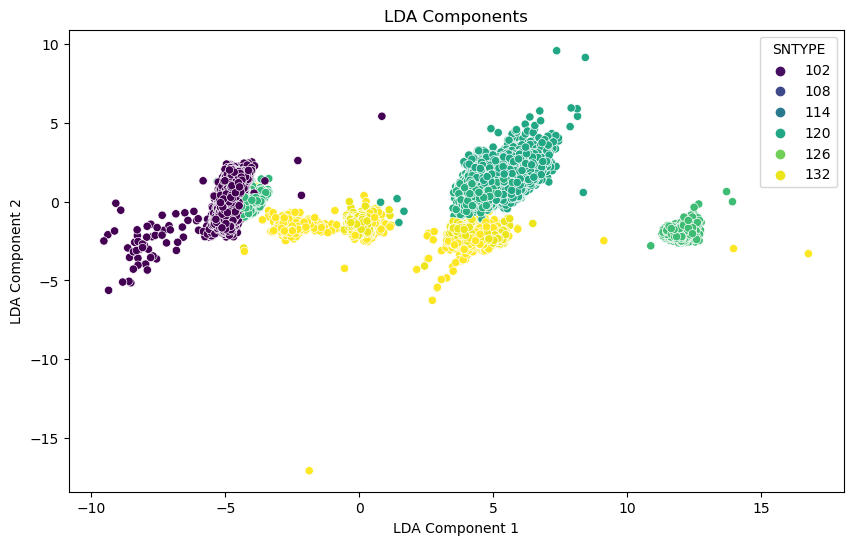

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=lda_df, x='LDA_Component_1', y='LDA_Component_2', hue='SNTYPE', palette='viridis')
plt.title('LDA Components')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()

In [67]:
explained_variance_ratio = lda.explained_variance_ratio_

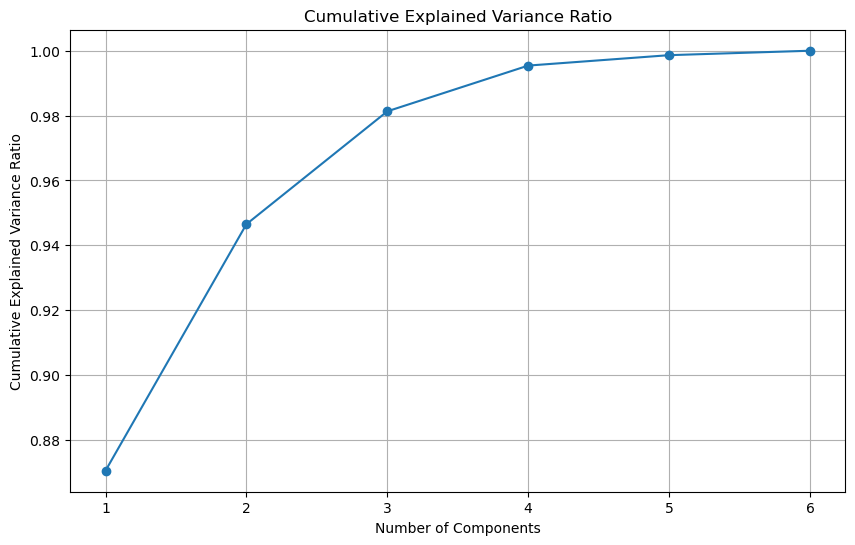

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

- Here in LDA, based on the explained variance ratio (same as explained in PCA), 6 is the number of components that needs to be considered as at 6 number of components the explained variance ratio becomes relatively stable
- Here 6 is also equal to the n classes - 1

### Singular Value Decomposition

- SVD stands for Singular Value Decomposition. It's a fundamental matrix factorization technique used in linear algebra and numerical analysis.

In [76]:
svd = TruncatedSVD(n_components=scaled_df.shape[1])  
X_svd_transformed = svd.fit_transform(scaled_df)

In [119]:
# Calculating the number of components with 95 percent variance
cumulative_variance_ratio = np.cumsum(svd.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

In [78]:
svd = TruncatedSVD(n_components=n_components)
X_svd_transformed = svd.fit_transform(scaled_df)

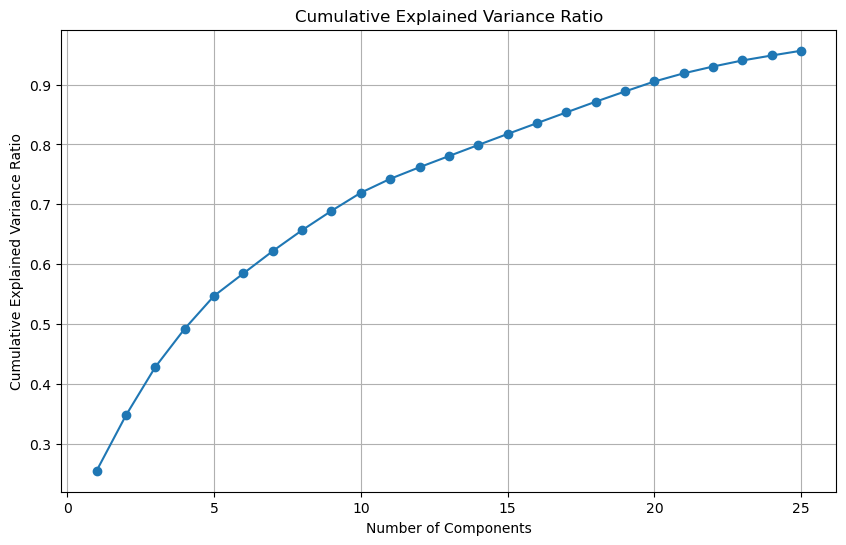

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_variance_ratio[:n_components], marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


- again here from the graph it can be observed that at 25 components, the cumulative explained variance becomes constant.

In [80]:
print("Number of selected components to explain 95% variance:", n_components)

Number of selected components to explain 95% variance: 25


In [81]:
print("Transformed Matrix using TruncatedSVD:")
print(X_svd_transformed)

Transformed Matrix using TruncatedSVD:
[[-0.58635478 -0.62241814 -1.5166352  ... -0.01639663  0.67914025
  -0.13344415]
 [-7.04867481  2.67644057 -0.62088145 ...  0.05281388  0.16711606
   0.20577322]
 [-0.53992107 -4.0671713  -0.30030587 ...  0.41936283  0.79531986
  -1.27767269]
 ...
 [-2.13765264 -0.65454058 -1.42313428 ...  0.22565369  0.33460304
  -0.03035313]
 [10.36926272 -5.93213278 -2.53458293 ... -2.18640691  0.13524557
   4.59104756]
 [-0.65435457 -1.12758248  1.93111016 ...  0.55864474 -0.04164033
  -0.41131834]]


### No Dimensionality reduction

In [96]:
X = imputed_df.drop(columns=['SNTYPE'])
X_train, X_test, y_train, y_test = train_test_split(X, df['SNTYPE'], test_size=0.2, random_state=42)

In [97]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
   "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVM": SVC(random_state=42)
}

In [101]:
for name, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)
    train_accuracy = classifier.score(X_train_scaled, y_train)
    test_accuracy = classifier.score(X_test_scaled, y_test)
    print(f"{name} Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")

Random Forest Train Accuracy: 1.00, Test Accuracy: 1.00
Decision Tree Train Accuracy: 1.00, Test Accuracy: 1.00
KNN Train Accuracy: 0.93, Test Accuracy: 0.89
Naive Bayes Train Accuracy: 1.00, Test Accuracy: 1.00
Logistic Regression Train Accuracy: 1.00, Test Accuracy: 1.00
SVM Train Accuracy: 1.00, Test Accuracy: 0.99


### PCA

In [102]:
X_pca_train = pca.transform(X_train_scaled)
X_pca_test = pca.transform(X_test_scaled)

for name, classifier in classifiers.items():
    classifier.fit(X_pca_train, y_train)
    train_accuracy = classifier.score(X_pca_train, y_train)
    test_accuracy = classifier.score(X_pca_test, y_test)
    print(f"{name} with PCA Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")

Random Forest with PCA Train Accuracy: 1.00, Test Accuracy: 0.96
Decision Tree with PCA Train Accuracy: 1.00, Test Accuracy: 0.91
KNN with PCA Train Accuracy: 0.92, Test Accuracy: 0.86
Naive Bayes with PCA Train Accuracy: 0.87, Test Accuracy: 0.86
Logistic Regression with PCA Train Accuracy: 1.00, Test Accuracy: 1.00
SVM with PCA Train Accuracy: 1.00, Test Accuracy: 0.99


## LDA

In [103]:
X_lda_train = lda.fit_transform(X_train_scaled, y_train)
X_lda_test = lda.transform(X_test_scaled)

for name, classifier in classifiers.items():
    classifier.fit(X_lda_train, y_train)
    train_accuracy = classifier.score(X_lda_train, y_train)
    test_accuracy = classifier.score(X_lda_test, y_test)
    print(f"{name} with LDA Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")

Random Forest with LDA Train Accuracy: 1.00, Test Accuracy: 1.00
Decision Tree with LDA Train Accuracy: 1.00, Test Accuracy: 1.00
KNN with LDA Train Accuracy: 1.00, Test Accuracy: 1.00
Naive Bayes with LDA Train Accuracy: 1.00, Test Accuracy: 1.00


C:\Users\ramit\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression with LDA Train Accuracy: 0.46, Test Accuracy: 0.45
SVM with LDA Train Accuracy: 1.00, Test Accuracy: 1.00


### SVD

In [104]:
X_svd_train = svd.fit_transform(X_train_scaled)
X_svd_test = svd.transform(X_test_scaled)

for name, classifier in classifiers.items():
    classifier.fit(X_svd_train, y_train)
    train_accuracy = classifier.score(X_svd_train, y_train)
    test_accuracy = classifier.score(X_svd_test, y_test)
    print(f"{name} with SVD Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")

Random Forest with SVD Train Accuracy: 1.00, Test Accuracy: 0.95
Decision Tree with SVD Train Accuracy: 1.00, Test Accuracy: 0.90
KNN with SVD Train Accuracy: 0.92, Test Accuracy: 0.86
Naive Bayes with SVD Train Accuracy: 0.86, Test Accuracy: 0.85
Logistic Regression with SVD Train Accuracy: 1.00, Test Accuracy: 1.00
SVM with SVD Train Accuracy: 1.00, Test Accuracy: 0.99


## Comparitive Analysis

- Without Dimensionality Reduction:

    - Random Forest, Decision Tree, Naive Bayes, Logistic Regression, and SVM models achieve high train and test accuracies, indicating good performance.
   -  KNN model shows slight overfitting, with a higher train accuracy compared to the test accuracy.
- With PCA (Principal Component Analysis):

    - Random Forest and Decision Tree models maintain high accuracies, but there's a slight decrease in test accuracy compared to the no-reduction scenario.
   -  KNN and Naive Bayes models experience a decrease in both train and test accuracies, indicating that PCA might not be suitable for these models in this scenario.
   -  Logistic Regression and SVM models maintain high accuracies similar to the no-reduction scenario.
- With LDA (Linear Discriminant Analysis):

    - Random Forest, Decision Tree, KNN, Naive Bayes, and SVM models achieve high accuracies, similar to the no-reduction scenario.
    - Logistic Regression model experiences a significant drop in both train and test accuracies, indicating that LDA might not be suitable for this model in this scenario.
    
- With SVD (Singular Value Decomposition):

    - Random Forest and Decision Tree models maintain high accuracies, but there's a slight decrease in test accuracy compared to the no-reduction scenario.
    - KNN and Naive Bayes models experience a decrease in both train and test accuracies, similar to the PCA scenario.
    - Logistic Regression and SVM models maintain high accuracies similar to the no-reduction scenario.
    
- Comparative Analysis:

    - Random Forest and Decision Tree models generally perform well across all reduction techniques, indicating robustness to dimensionality reduction.
    - KNN and Naive Bayes models exhibit decreased performance with dimensionality reduction, suggesting that these models might not benefit from these techniques in this context.
   - Logistic Regression model's performance varies with reduction techniques, highlighting the importance of selecting the appropriate method based on the model and dataset characteristics.
    - SVM model generally maintains high performance across reduction techniques, indicating resilience to dimensionality reduction.

- The choice of the number of components can affect the performance of dimensionality reduction techniques, as seen in the varying results with different methods.